<a href="https://colab.research.google.com/github/Chanda92/Data-Science-Projects/blob/master/Automobile_data_analysis/Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
#import dataset

import os

os.environ['KAGGLE_USERNAME'] = "chandabakshi" # username from the json file

os.environ['KAGGLE_KEY'] = "ff81813a84c08d29cf3330a9d2f8bc17" # key from the json file

!kaggle datasets download -d toramky/automobile-dataset # api copied from kaggle

automobile-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "automobile-dataset.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Automobile_data.csv                            2019-09-20 16:04:24        25070
Extracting all the files now...
Done!


In [ ]:
df = pd.read_csv("Automobile_data.csv")
df.shape

(205, 26)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Replace the "?" to NaN Values

In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Deal with missing values in dataset.

There are two ways to detect the NaN values:

1.   isnull()
2.   notnull()

These functions may produce boolean values:

*   True indicates missing data
*   False indicates No missing data





In [ ]:
missing_df = df.isnull()
missing_df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Count the number of missing values as per columnwise

for i in missing_df.columns.values.tolist():
    print(i)
    print(missing_df[i].value_counts())
    print(" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

# There are 7 columns contained missing values



1.   normalized-losses (41)
2.   num-of-doors (2)
3.   bore (4)
4.   stroke (4)
5.   horsepower (2)
6.   peak-rpm (2)
7.   price (4)

# Handle missing data

Replace by mean:

1.   normalized-losses (41)
2.   bore (4)
3.   stroke (4)
4.   horsepower (2)
5.   peak-rpm (2)

Replace by frequency :

1.   **num-of-doors (2)** -  84% sedans is four doors. Since four doors is most frequently occur.
2.   **price (2)** - Remove whole row because price is what we want to       predict. Any data entry without price data cannot be used for prediction; thus any row now without price data is not useful to us

# Replace the normalise-losses with mean

In [ ]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer

normalise_mean = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", normalise_mean)


Average of normalized-losses: 122.0


In [ ]:
df["normalized-losses"].replace(np.nan,normalise_mean,inplace=True)

In [ ]:
bore_mean = df["bore"].astype("float").mean(axis=0)
print("Average of Bore Values:",bore_mean)

Average of Bore Values: 3.3297512437810957


In [ ]:
df["bore"].replace(np.nan,bore_mean,inplace=True)

In [ ]:
stroke_mean = df["stroke"].astype("float").mean(axis=0)
print("Average of Stroke Values:",stroke_mean)

Average of Stroke Values: 3.2554228855721337


In [ ]:
df["stroke"].replace(np.nan,stroke_mean,inplace = True)

In [ ]:
horsepower_mean = df['horsepower'].astype("float").mean(axis=0)
print("Average horsepower:", horsepower_mean)

Average horsepower: 104.25615763546799


In [ ]:
df['horsepower'].replace(np.nan, horsepower_mean, inplace=True)

In [ ]:
peakrpm_mean=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", peakrpm_mean)

Average peak rpm: 5125.369458128079


In [ ]:
df['peak-rpm'].replace(np.nan, peakrpm_mean, inplace=True)

In [ ]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
df['num-of-doors'].replace(np.nan,"four",inplace=True)

# Finally we drop the price column rows where data is missing

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"],axis=0,inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Convert the datatype in proper format

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

**# Univariate Analysis**

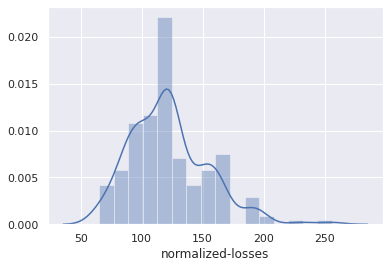

In [ ]:
sns.distplot(df['normalized-losses'])

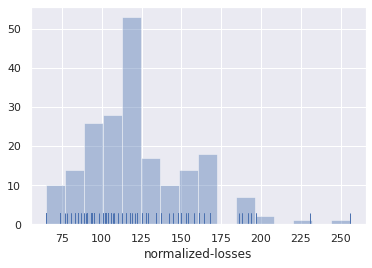

In [ ]:
sns.distplot(df['normalized-losses'],kde=False,rug= True)

# Bivariate Analysis(Jointplot)

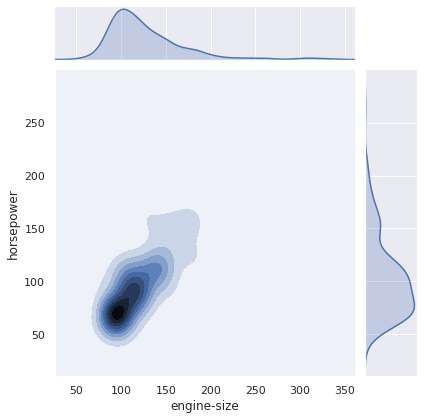

In [ ]:
sns.jointplot(df['engine-size'],df['horsepower'],kind='kde')

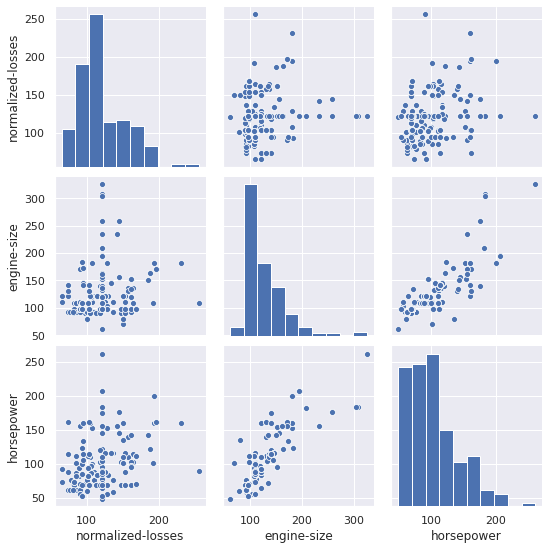

In [ ]:
df['horsepower']=df['horsepower'].astype(float)
sns.pairplot(df[['normalized-losses', 'engine-size', 'horsepower']])

# Multivariate Distribution Analysis

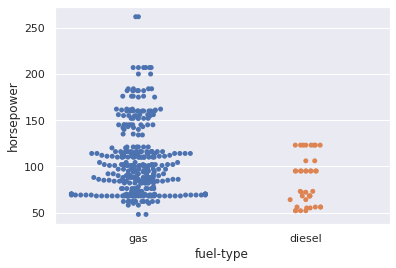

In [ ]:
sns.stripplot(df['fuel-type'], df['horsepower'], jitter=True)
sns.swarmplot(df['fuel-type'], df['horsepower'])

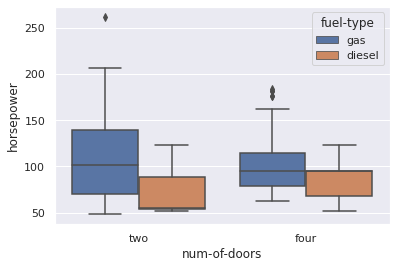

In [ ]:
sns.boxplot(df['num-of-doors'], df['horsepower'], hue=df['fuel-type'])

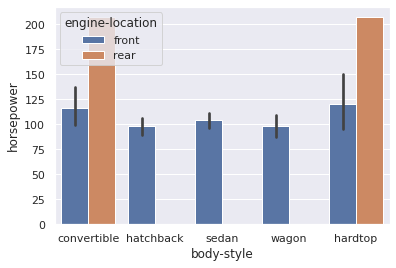

In [ ]:
sns.barplot(df['body-style'], df['horsepower'], hue=df['engine-location'])

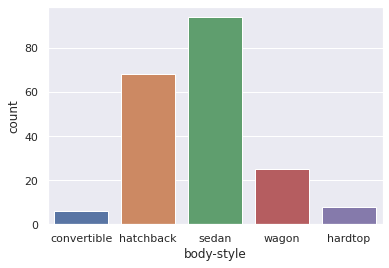

In [ ]:
sns.countplot(df['body-style'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


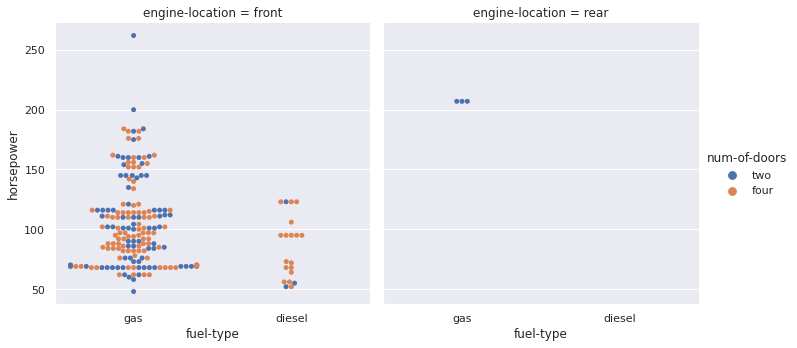

In [ ]:
sns.factorplot(x="fuel-type", 
               y="horsepower", 
               hue="num-of-doors", 
               col="engine-location", 
               data=df, 
               kind="swarm")

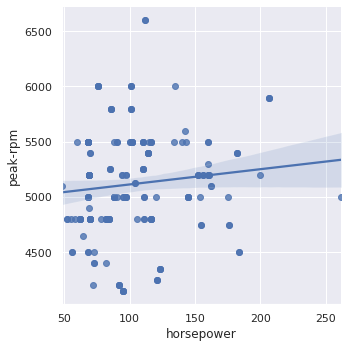

In [ ]:
sns.lmplot(x="horsepower", y="peak-rpm", data=df)

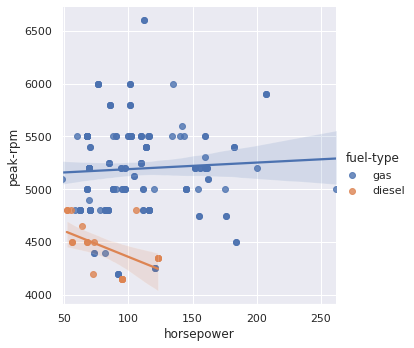

In [ ]:
## Function to draw linear regression models

sns.lmplot(x="horsepower", y="peak-rpm",hue="fuel-type", data=df)

# Descriptive Statistical Analysis


In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
df['drive-wheels'].value_counts().to_frame()


,drive-wheels
fwd,118
rwd,75
4wd,8


In [ ]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3
